**Logistic Regression Analysis by Aana Kakroo (20BAI1138)**

Import the required Python libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


Load the dataset

In [39]:
heart = pd.read_csv(r"C:\Users\aanak\OneDrive\Desktop\Materials for college\ML\LAB\heart disease\heart.csv")

Get information on the data in each column of datasrt

In [40]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From above, we can see that there are no NULL or missing values in the dataset

Get statistical description of data in the dataset

In [41]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Display first 5 columns of dataset

In [42]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Get the count of different values in target column (number of people who have/don't have heart disease)

In [43]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Visualising the count of different values in target

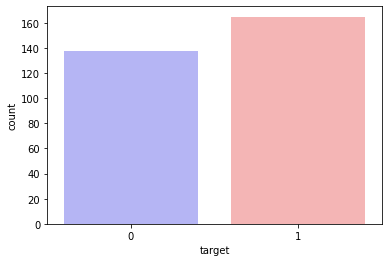

In [59]:
sns.countplot(x="target", data=heart, palette="bwr")
plt.show()

There are more diseased people than healthy, as observable from above graph

Count of number of males/females 

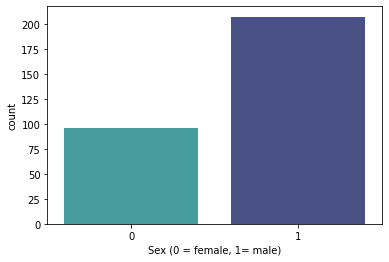

In [61]:
sns.countplot(x='sex', data=heart, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

According to above graph, there are more males than females

Frequency of having heart diseases for each age

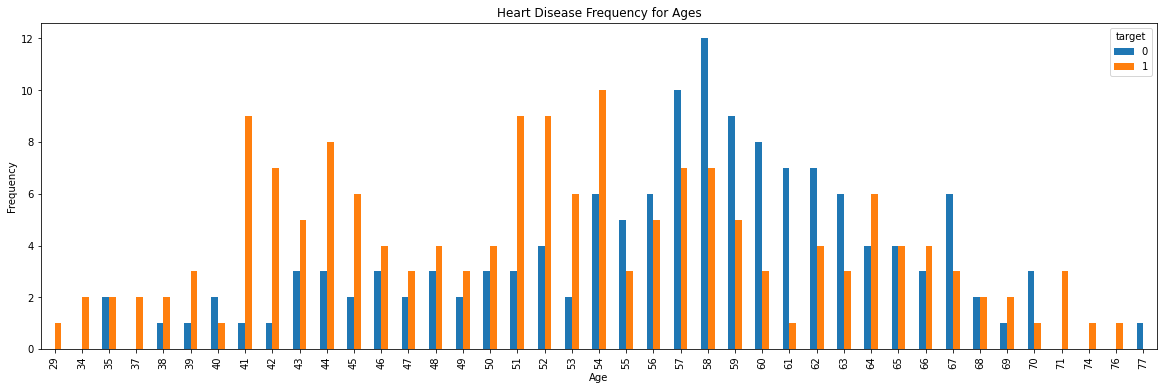

In [62]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

Most healthy people are of age 58 years and most diseased people are of age 54.
People in their mid 50s are most likely to be diseased and people in their late 50s to early 60s are more likely to be healthy.

Frequency of having heart disease for each gender (male/female)

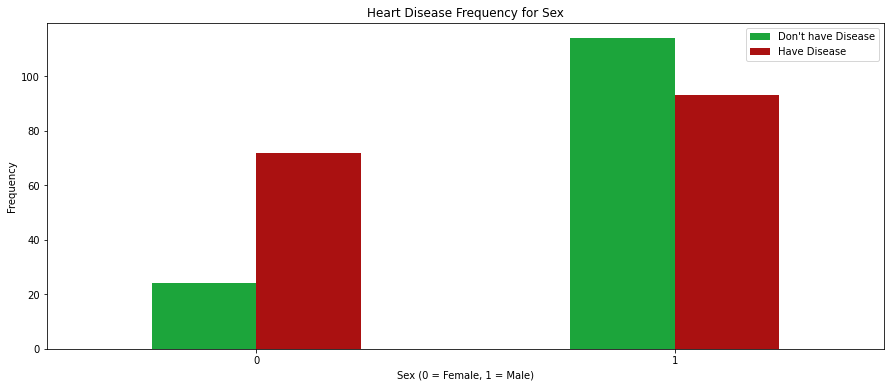

In [64]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

There are more diseased women than healthy women and for men it is vice versa.

Maximum heart rate vs disease/no disease scatter plot

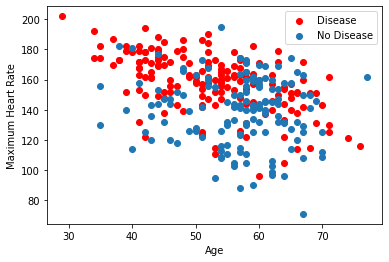

In [66]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="red")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Heart disease frequem=ncy according to chest pain type

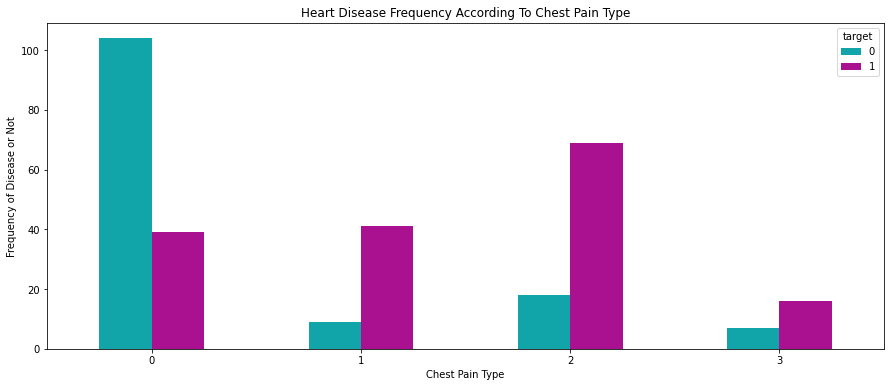

In [68]:
pd.crosstab(heart.cp,heart.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

People having chest pain type 2 are most likely to have heart disease and people having chest pain type 0 are most likely to be healthy.

Splitting dataframe into x, y where x contains independant variables and y contains the dependant or target variable

In [44]:
y=heart.target.values
x=heart.drop(["target"],axis=1)

Normalization of data in x

In [45]:
x = (x - np.min(x))/(np.max(x)-np.min(x)).values # normalizition

Splitting data for training and testing

In [46]:
#train_and_test_data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

In [48]:
#initializing parameters and sigmoid function
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

In [49]:
#forward and backward propogation
def forward_backward_propogation(w,b,x_train,y_train):
    #forward
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss=y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    #backward
    derivative_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

In [50]:
#update parameters
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list=[]
    cost_list2=[]
    index=[]
    #updating(learning) parameters is number of iteration times
    for i in range(number_of_iteration):
        #make forward and backward propogation and find cost,gradients
        cost,gradients=forward_backward_propogation(w,b,x_train,y_train)
        cost_list.append(cost)
        w=w-learning_rate*gradients["derivative_weight"]
        b=b-learning_rate*gradients["derivative_bias"]
        if i%10==0:
            cost_list2.append(cost)
            index.append(i)
            print("cost after iteration %i : %f" %(i,cost))
    parameters={"weight":w,"bias":b}        
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters,gradients,cost_list

In [51]:
#parameters
def predict(w,b,x_test):
    #x_test is a input for forward propogation
    z=sigmoid(np.dot(w.T,x_test)+b)
    y_prediction=np.zeros((1,x_test.shape[1]))
    #if z>0.5, our prediction is one
    #if z<0.5, our prediction is zero
    for i in range(z.shape[1]):
        if z[0,i]<=0.5 :
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    return y_prediction

In [52]:
#implementing logistic regression
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,number_of_iteration):
    #initialize
    dimension=x_train.shape[0]
    w,b= initialize_weights_and_bias(dimension)
    parameters,gradients,cost_list=update(w,b,x_train,y_train,learning_rate,number_of_iteration)
    y_prediction_test=predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train=predict(parameters["weight"],parameters["bias"],x_train)
    print("train accuracy: {} %".format(100-np.mean(np.abs(y_prediction_train-y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(y_prediction_test-y_test))*100))

cost after iteration 0 : -0.042377
cost after iteration 10 : -0.015793
cost after iteration 20 : -0.005971
cost after iteration 30 : -0.002032
cost after iteration 40 : -0.000135
cost after iteration 50 : 0.001060
cost after iteration 60 : 0.002010
cost after iteration 70 : 0.002863
cost after iteration 80 : 0.003665
cost after iteration 90 : 0.004424
cost after iteration 100 : 0.005141
cost after iteration 110 : 0.005815
cost after iteration 120 : 0.006446
cost after iteration 130 : 0.007032
cost after iteration 140 : 0.007578
cost after iteration 150 : 0.008083
cost after iteration 160 : 0.008550
cost after iteration 170 : 0.008983
cost after iteration 180 : 0.009383
cost after iteration 190 : 0.009753
cost after iteration 200 : 0.010096
cost after iteration 210 : 0.010414
cost after iteration 220 : 0.010708
cost after iteration 230 : 0.010981
cost after iteration 240 : 0.011235
cost after iteration 250 : 0.011471
cost after iteration 260 : 0.011691
cost after iteration 270 : 0.01189

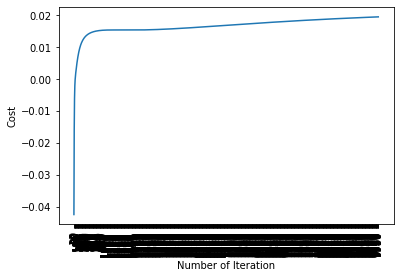

train accuracy: 86.77685950413223 %
test accuracy: 85.24590163934427 %


In [53]:
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=0.1,number_of_iteration=10000)

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)

LogisticRegression()

In [55]:
lr.score(x_test.T,y_test.T)

0.8524590163934426

In [56]:
lr.score(x_train.T,y_train.T)

0.8388429752066116

Confusion matrix

In [72]:
# Getting predicted values
y_head_lr = lr.predict(x_test.T)

In [74]:
#import required python libraries
from sklearn.metrics import confusion_matrix

#get confusion matrix from test data
cm_lr = confusion_matrix(y_test,y_head_lr)

<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}>

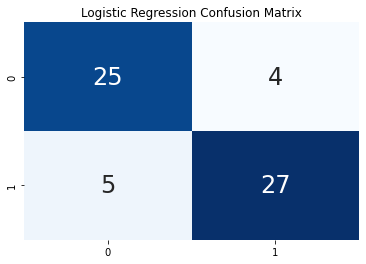

In [75]:
#plot confusion matrix as heatmap
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

As we can see from the confusion matrix above, the accuracy of the model is good and hence the prediction of heart disease by Logistic Regression model is suitable. From the given testing data, only 9 predicitons were incorrect and 52 predicitons were correct. Hence, Logistic Regression model is apt for telling us whether or not a person has heart disease based on given data.